* My first attempt to work on Regression model 
* My Data Analytics skills are still in beginner level. Hence little Data Analytics
* Most of the Notebooks are overwhelming with lots of concepts, but this one will be simple
Happy Hunting !
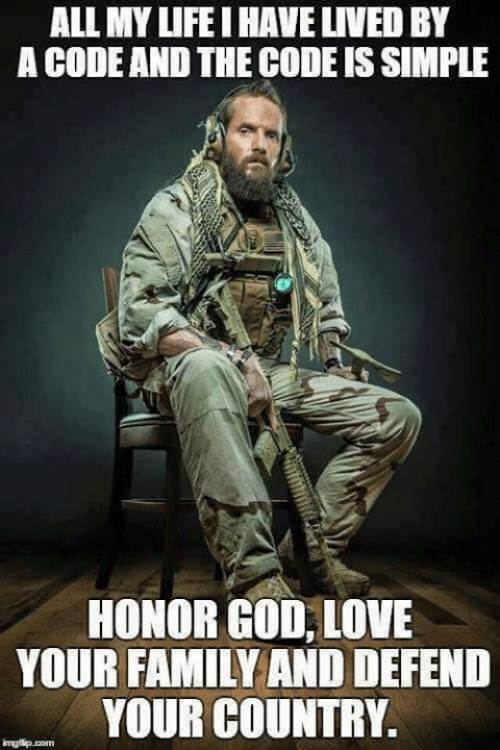

Please upvote if you like this Notebook 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv


In [2]:
df_train  = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')   

In [3]:
df_train[df_train.columns[1:]].corr()['SalePrice'][:]        

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

The corelation data shown above doesn't provide the accurate information as it contains lots of missing values 

In [4]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Dealing with missing Values**
* I made it simple by the filling the float and int type data with Mean of respective column
* For Data type with Object fill with Mode


**First check the Train Dataset and Test Dataset for Missing values**

In [5]:

df_train.isnull().sum().sort_values(ascending = False)[0:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [6]:

df_test.isnull().sum().sort_values(ascending = False)[0:40]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
HouseStyle         0
LandSlope          0
MSSubClass         0
LotArea            0
Street             0
LotShape           0
LandContour        0
dtype: int64

In [7]:
for col in df_train:
    if df_train[col].dtype == 'object':
      df_train[col] = df_train[col].fillna(df_train[col].mode()[0])
    else:
       df_train[col].fillna(round(df_train[col].mean()),inplace = True)


for col in df_test:
      if df_test[col].dtype == 'object':
          df_test[col] = df_test[col].fillna(df_test[col].mode()[0])
      else:
        df_test[col].fillna(round(df_test[col].mean()),inplace = True)


* Check the Train and Test data now for any missing values

In [8]:
df_train.isnull().any().any()


False

In [9]:
df_test.isnull().any().any()

False

In [10]:
df_train.drop(columns = ['Id', ],axis = 1, inplace =True)
df_test.drop(columns = ['Id'],axis = 1, inplace =True)

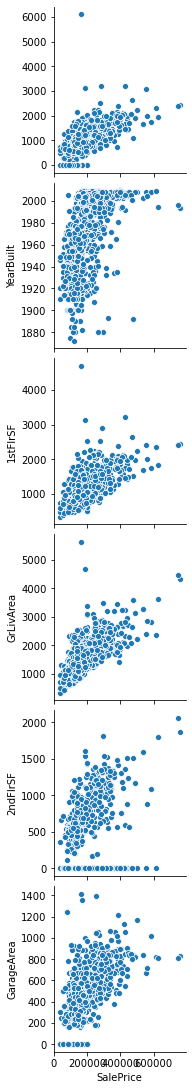

In [11]:
import seaborn as sns
sns.pairplot(df_train, x_vars=["SalePrice"],
                 y_vars=[ "TotalBsmtSF", 'YearBuilt','1stFlrSF','GrLivArea','2ndFlrSF','GarageArea'], 
             corner = True)

**Now we have to deal with Categorical Data types**
* One hot Encoded is applied to all the columns with Categorical Data

* Below function is used for one hot encoding

In [12]:

def cat_onehotencoder(df_concat):
    df_temp = df_concat
    for col in df_temp:
        if df_temp[col].dtype =='object':
            df1 = pd.get_dummies(df_concat[col], drop_first = True)
            df_concat.drop([col], axis = 1, inplace = True)
            
            df_concat = pd.concat([df_concat,df1], axis = 1)
        
    
        
    
    return df_concat

In [13]:
y = df_train.iloc[:,-1].values
df_t = df_train
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [14]:
df_train.drop(columns = ['SalePrice'], axis = 0, inplace = True)

Concatenate Test and Train data to develop the categorical data

In [15]:
df_concat = pd.concat([df_train,df_test], axis = 0)
df_final =  cat_onehotencoder(df_concat)

In [16]:
df_final =df_final.loc[:,~df_final.columns.duplicated()]
df_final.shape

(2919, 181)

In [17]:
df_final

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,0,1,0,0,0,1,0


* Now categorical columns has been taken care 

Absolute overall correlations
------------------------------
MSSubClass        3.952617
LotFrontage       6.272573
LotArea           4.672348
OverallQual      10.253973
OverallCond       4.017339
YearBuilt         8.699345
YearRemodAdd      7.374047
MasVnrArea        6.897017
BsmtFinSF1        6.974484
BsmtFinSF2        3.034292
BsmtUnfSF         6.102127
TotalBsmtSF       9.667476
1stFlrSF          9.686947
2ndFlrSF          7.026573
LowQualFinSF      2.602165
GrLivArea        10.690335
BsmtFullBath      5.401866
BsmtHalfBath      2.297760
FullBath          9.185380
HalfBath          5.618060
BedroomAbvGr      5.699306
KitchenAbvGr      3.883862
TotRmsAbvGrd      8.926239
Fireplaces        6.810898
GarageYrBlt       7.952453
GarageCars        9.494431
GarageArea        9.373488
WoodDeckSF        5.306749
OpenPorchSF       5.602264
EnclosedPorch     3.735990
3SsnPorch         1.898501
ScreenPorch       2.915806
PoolArea          3.036172
MiscVal           1.680295
MoSold            2.0

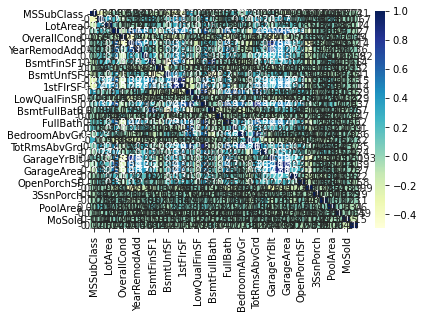

In [18]:
import seaborn as sns
correlations = df_train[df_train.columns].corr(method='pearson')
sns.heatmap(correlations, cmap="YlGnBu", annot = True)

import heapq

print('Absolute overall correlations')
print('-' * 30)
correlations_abs_sum = correlations[correlations.columns].abs().sum()
print(correlations_abs_sum, '\n')

print('Weakest correlations')
print('-' * 30)
print(correlations_abs_sum.nsmallest(5))


**Split the Train and Test set from df_final**

In [19]:
train = df_final.iloc[:1460,:]
test = df_final.iloc[1460:,:]

In [20]:
X= train.iloc[:,:].values


In [21]:

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2)




In [22]:
#from sklearn.preprocessing import StandardScaler#
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_val = sc.transform(X_val)

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

gbreg=GradientBoostingRegressor()
parameters= {'n_estimators':[100,200,300, 600],
             'max_depth':[3,4,6,7]
    }

gbreg=GridSearchCV(gbreg, param_grid=parameters)
gbreg.fit(X_train,y_train)
print("The best value of leanring rate is: ",gbreg.best_params_, )

The best value of leanring rate is:  {'max_depth': 3, 'n_estimators': 200}


In [24]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_log_error
GB_reg = GradientBoostingRegressor(max_depth = 4, n_estimators = 300)
GB_reg.fit(X_train, y_train)

y_predgb = GB_reg.predict(X_val)
score_gb = r2_score(y_predgb, y_val)
MSL_gb = mean_squared_log_error(y_predgb,y_val)
print(score_gb, MSL_gb)


0.8653074216879258 0.014415032835795136


In [25]:
from xgboost import XGBRegressor
reg_xgb = XGBRegressor()
reg_xgb.fit(X_train,y_train)
ypred_xgb = reg_xgb.predict(X_val)

score_xgb = r2_score(ypred_xgb, y_val)
MSL_xgb = mean_squared_log_error(ypred_xgb,y_val)
print(score_xgb, MSL_xgb)

0.7968343377492666 0.018894689231156045


In [26]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators =75, random_state = 42)
regressor_rf.fit(X_train,y_train)
ypred_rf = regressor_rf.predict(X_val)
score_rf = r2_score(ypred_rf, y_val)
MSL_rf = mean_squared_log_error(ypred_rf,y_val)
print(score_rf, MSL_rf)

0.7662524671885702 0.01817474145576464


In [27]:
y_pred_final = GB_reg.predict(test)
y_pred_final

array([126626.73039892, 159725.94409292, 180680.30976899, ...,
       158797.088788  , 112946.21366225, 241750.03643226])

In [28]:
sub = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [29]:
SalePrice = pd.DataFrame(y_pred_final, columns = ['SalePrice'])
len(SalePrice)
SalePrice.insert(0, 'Id', sub['Id'], True)
SalePrice.to_csv('sample_submissions1.csv', index = False)

I have a better score but not the best 
Hyper parameters tuning is to be done on this to improve the results 
Also i haven't dealt with data skewedness 

**If you find this useful Please UPVOTE this notebook, Thanks**